In [48]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data = np.array(pd.read_excel('data/CustomerDataSet.xls')[['ItemsBought', 'ItemsReturned']])

In [50]:
checks = data.copy()

C:\Users\KTDS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


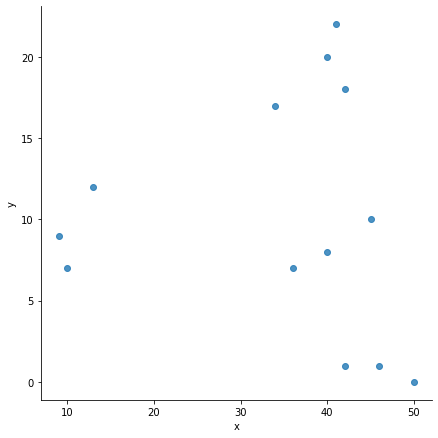

In [51]:
df = pd.DataFrame({"x": [v[0] for v in checks],
        "y": [v[1] for v in checks]})
sns.lmplot("x", "y", data=df, fit_reg=False, height=6)
plt.show()

In [52]:
def MinMaxScalar(x):
    
    #np.min(data , axis =0 -> 열 1-> 행) 열에서 최솟갑을 얻을 것이냐
    
    numerator = x - np.min(x,0)
    denominator = np.max(x,0) - np.min(x,0)
    
    return numerator / (denominator+1e-5)


In [53]:
k = 4
vectors = tf.constant(MinMaxScalar(checks)) # change tensor from data
centroides = tf.Variable(tf.slice(tf.random.shuffle(vectors), [0,0],[k,-1] ))


In [54]:

def get_cluster_means(idx,data,value):
    
    mid = tf.equal(data,idx)
    mid = tf.where(mid)
    mid = tf.reshape(mid,[1,-1])
    mid = tf.gather(value,mid)
    mean = tf.reduce_mean(mid,axis = 1)
    return mean






In [55]:
for step in range(10):
    expanded_vectors = tf.expand_dims(vectors, 0) #0번째 차원 확장 추가
    expanded_centroides = tf.expand_dims(centroides, 1) # 1번째 차원 확장 추가
    assignments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroides)), 2), 0)
    means = tf.concat([get_cluster_means(c,assignments,vectors) for c in range(k)],axis = 0)
    
    if centroides.numpy().all() == means.numpy().all():
        print("finish upload centroid")
        break
    
    centroides.assign(means)
    
    #거리 평균을 이용해 new centroid를 찾음

finish upload centroid


In [57]:
data = {"x": [], "y": [], "cluster": []}
for i in range(assignments.shape[0]):
    data["x"].append(vectors[i][0].numpy())
    data["y"].append(vectors[i][1].numpy())
    data["cluster"].append(assignments[i].numpy())
    


C:\Users\KTDS\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


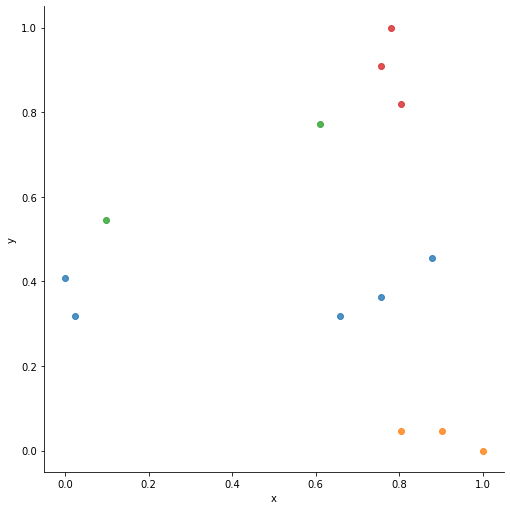

In [58]:

df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, 
           fit_reg=False, size=7, 
           hue="cluster", legend=False)
plt.show()